c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)\DL3_20241006\ch05
c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)\DL3_20241006
==========iteration:0===========
SGD:2.474945631846051
Momentum:2.354454167331063
AdaGrad:2.2262623158913306
Adam:2.214410157685613
==========iteration:100===========
SGD:1.4849995943797074
Momentum:0.2581007007276188
AdaGrad:0.11585589116170114
Adam:0.17383996549542652
==========iteration:200===========
SGD:0.7216542539497632
Momentum:0.22269352800061307
AdaGrad:0.10849304675028806
Adam:0.19412214770446173
==========iteration:300===========
SGD:0.5477413937265577
Momentum:0.2704718267568106
AdaGrad:0.15700924251277554
Adam:0.2181408725270342
==========iteration:400===========
SGD:0.388989829430543
Momentum:0.2556675918388931
AdaGrad:0.11137629718331779
Adam:0.22183755408549433
==========iteration:500===========
SGD:0.411969041026904
Momentum:0.1777567916822061
AdaGrad:0.07262975506740463
Adam:0.1391833751829567
==========iteration:600===========
SGD:0.3147647207922328
M

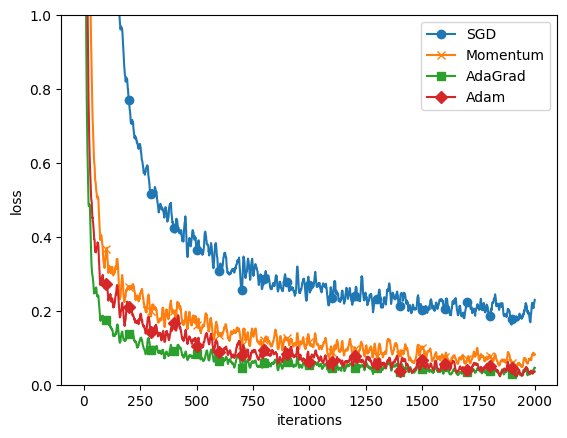

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

#0. MNIST 데이터 읽기========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정=============
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size = 784, hidden_size_list = [100, 100, 100, 100],
        output_size =10)
    train_loss[key] = [] #우선 초기화해둠

#2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("=========="+"iteration:"+str(i)+"===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

    
#3. 그래프 그리기==========
markers = {'SGD' : 'o', 'Momentum': 'x', "AdaGrad" : "s", "Adam" : "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]),marker=markers[key], markevery=100, label = key)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0,1)
plt.legend()
plt.show()


